# How to Train YOLO11 Object Detection on a Custom Dataset using roboflow platform


Projeto: https://universe.roboflow.com/lpmu06-jsgfm/we-690o3-ghh2q-kwwll



## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Nov 19 11:43:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [4]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("gun-detection-dh18v").project("we-690o3-ghh2q")
version = project.version(2)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to we-2 in yolov11:: 100%|██████████| 15772/15772 [00:03<00:00, 4773.68it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 150MB/s]
Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/we-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1732016773.be20372b3577.1389.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


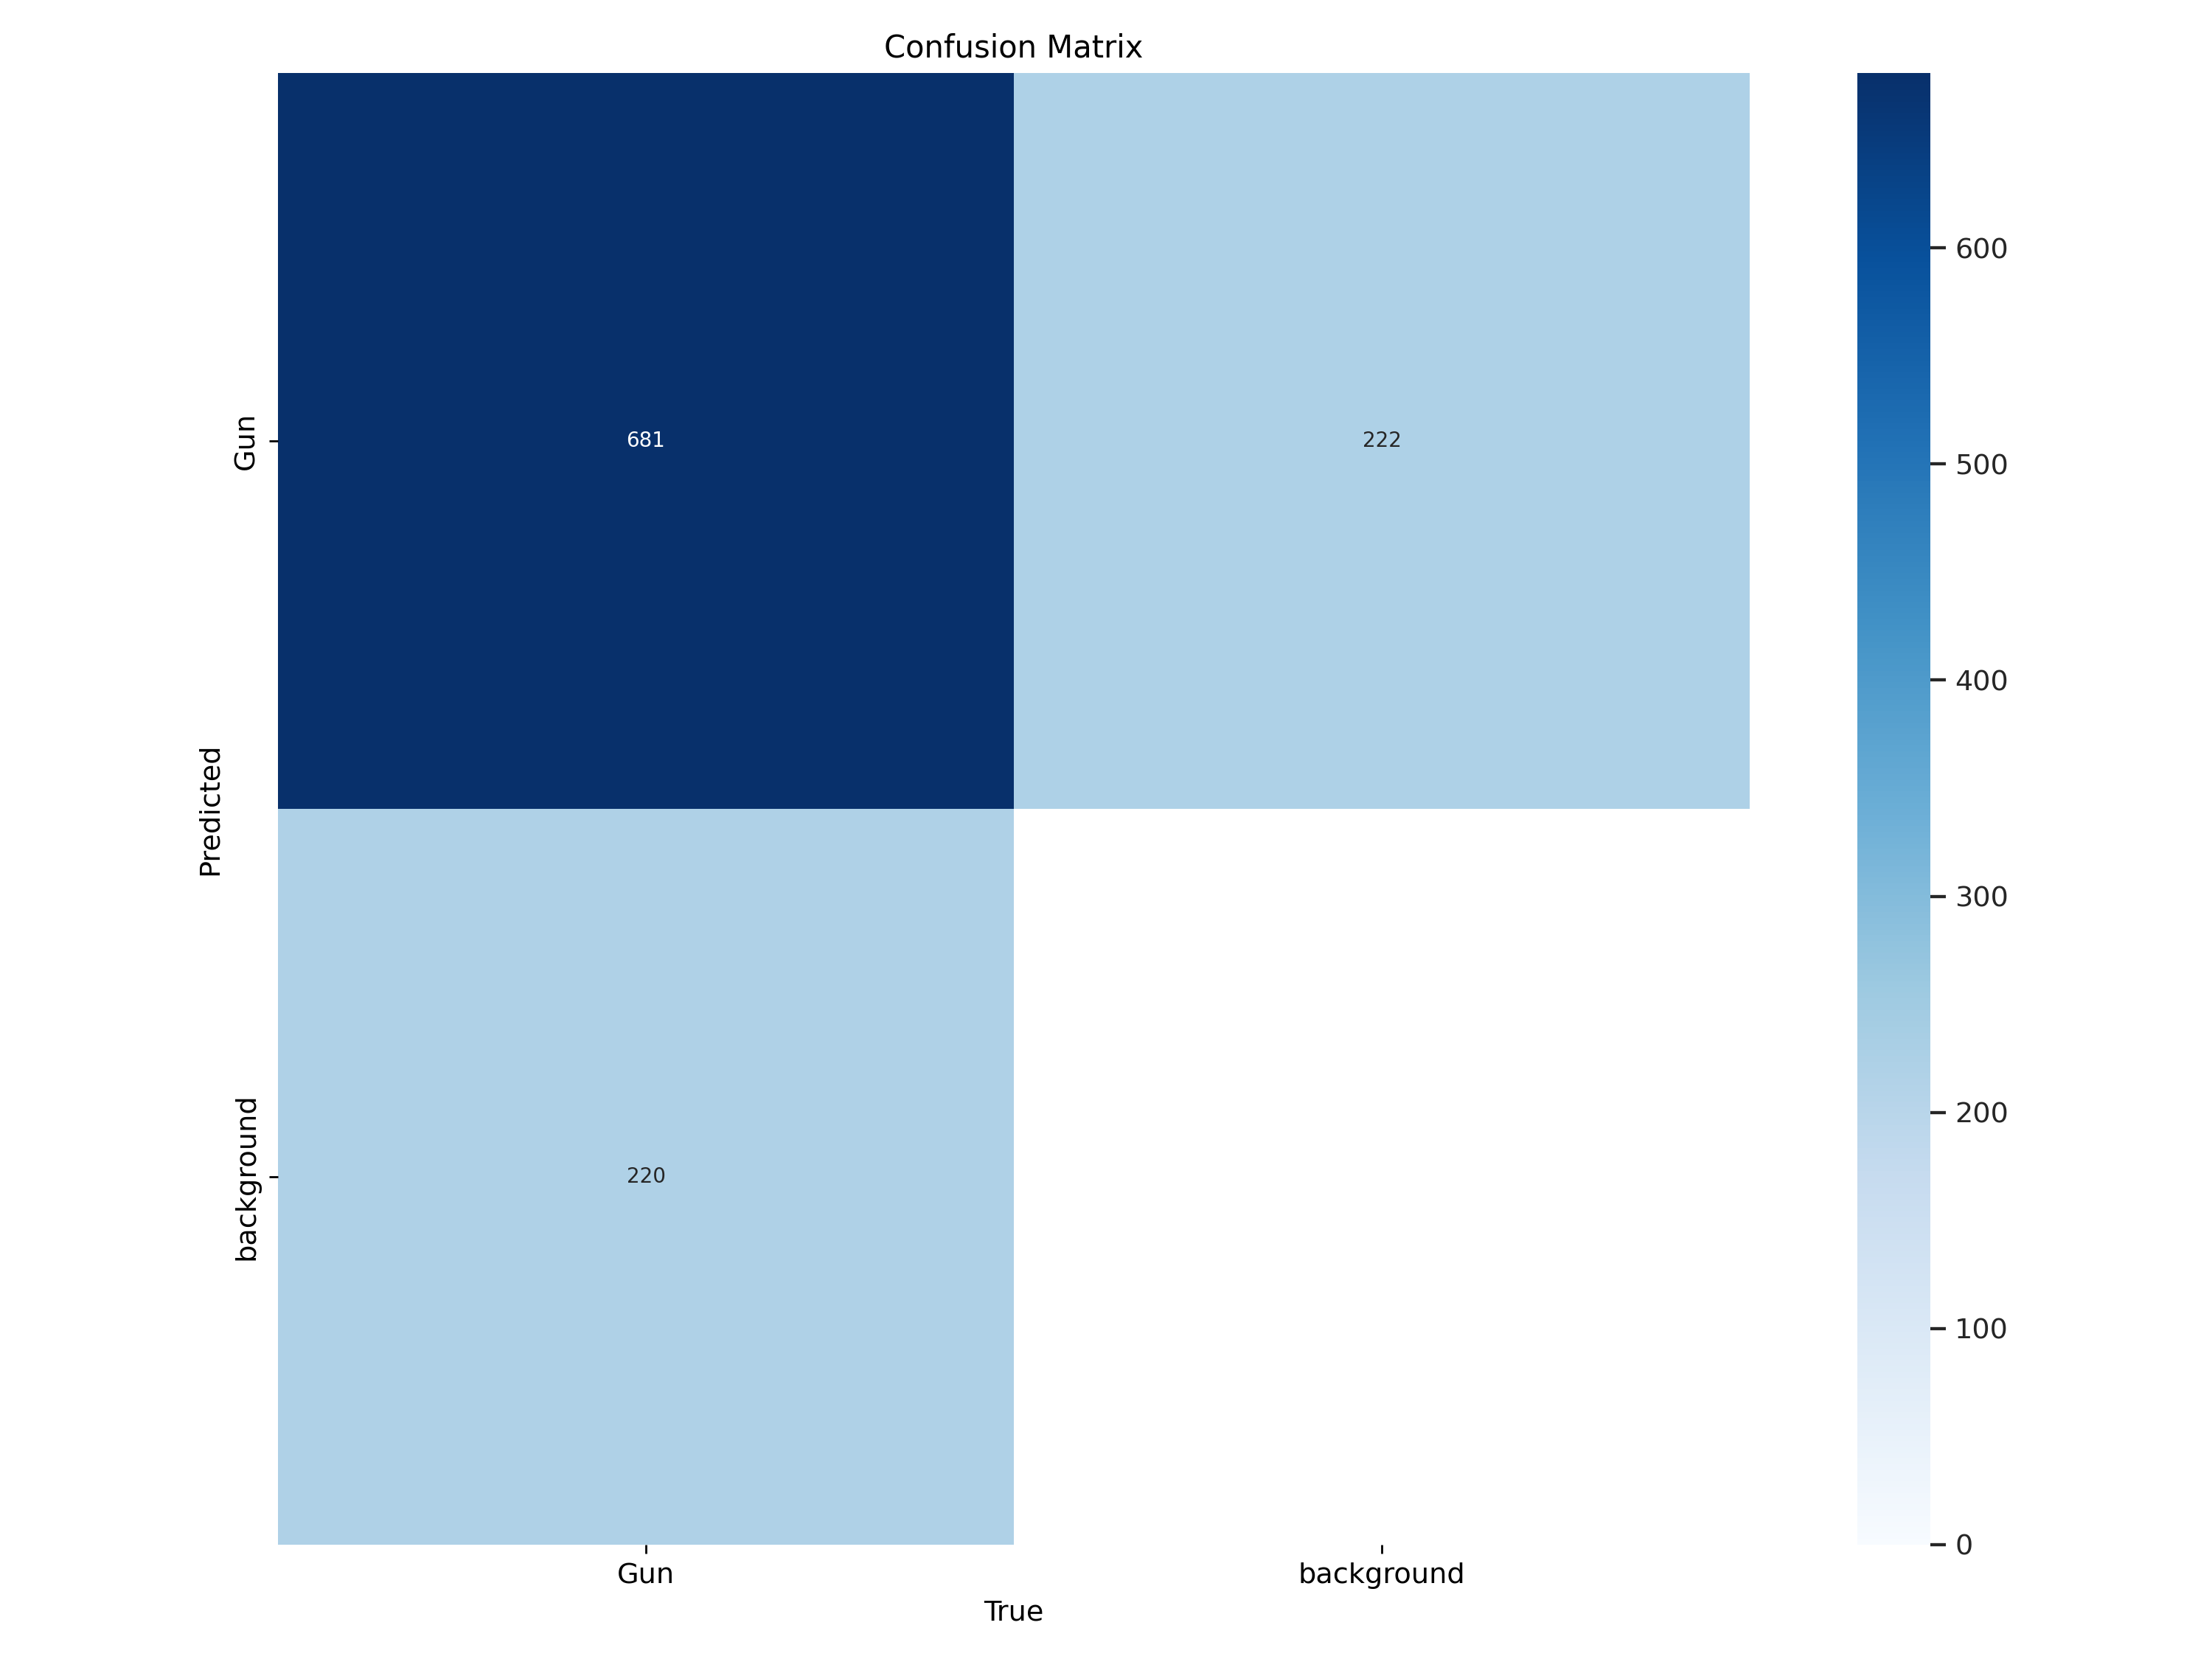

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

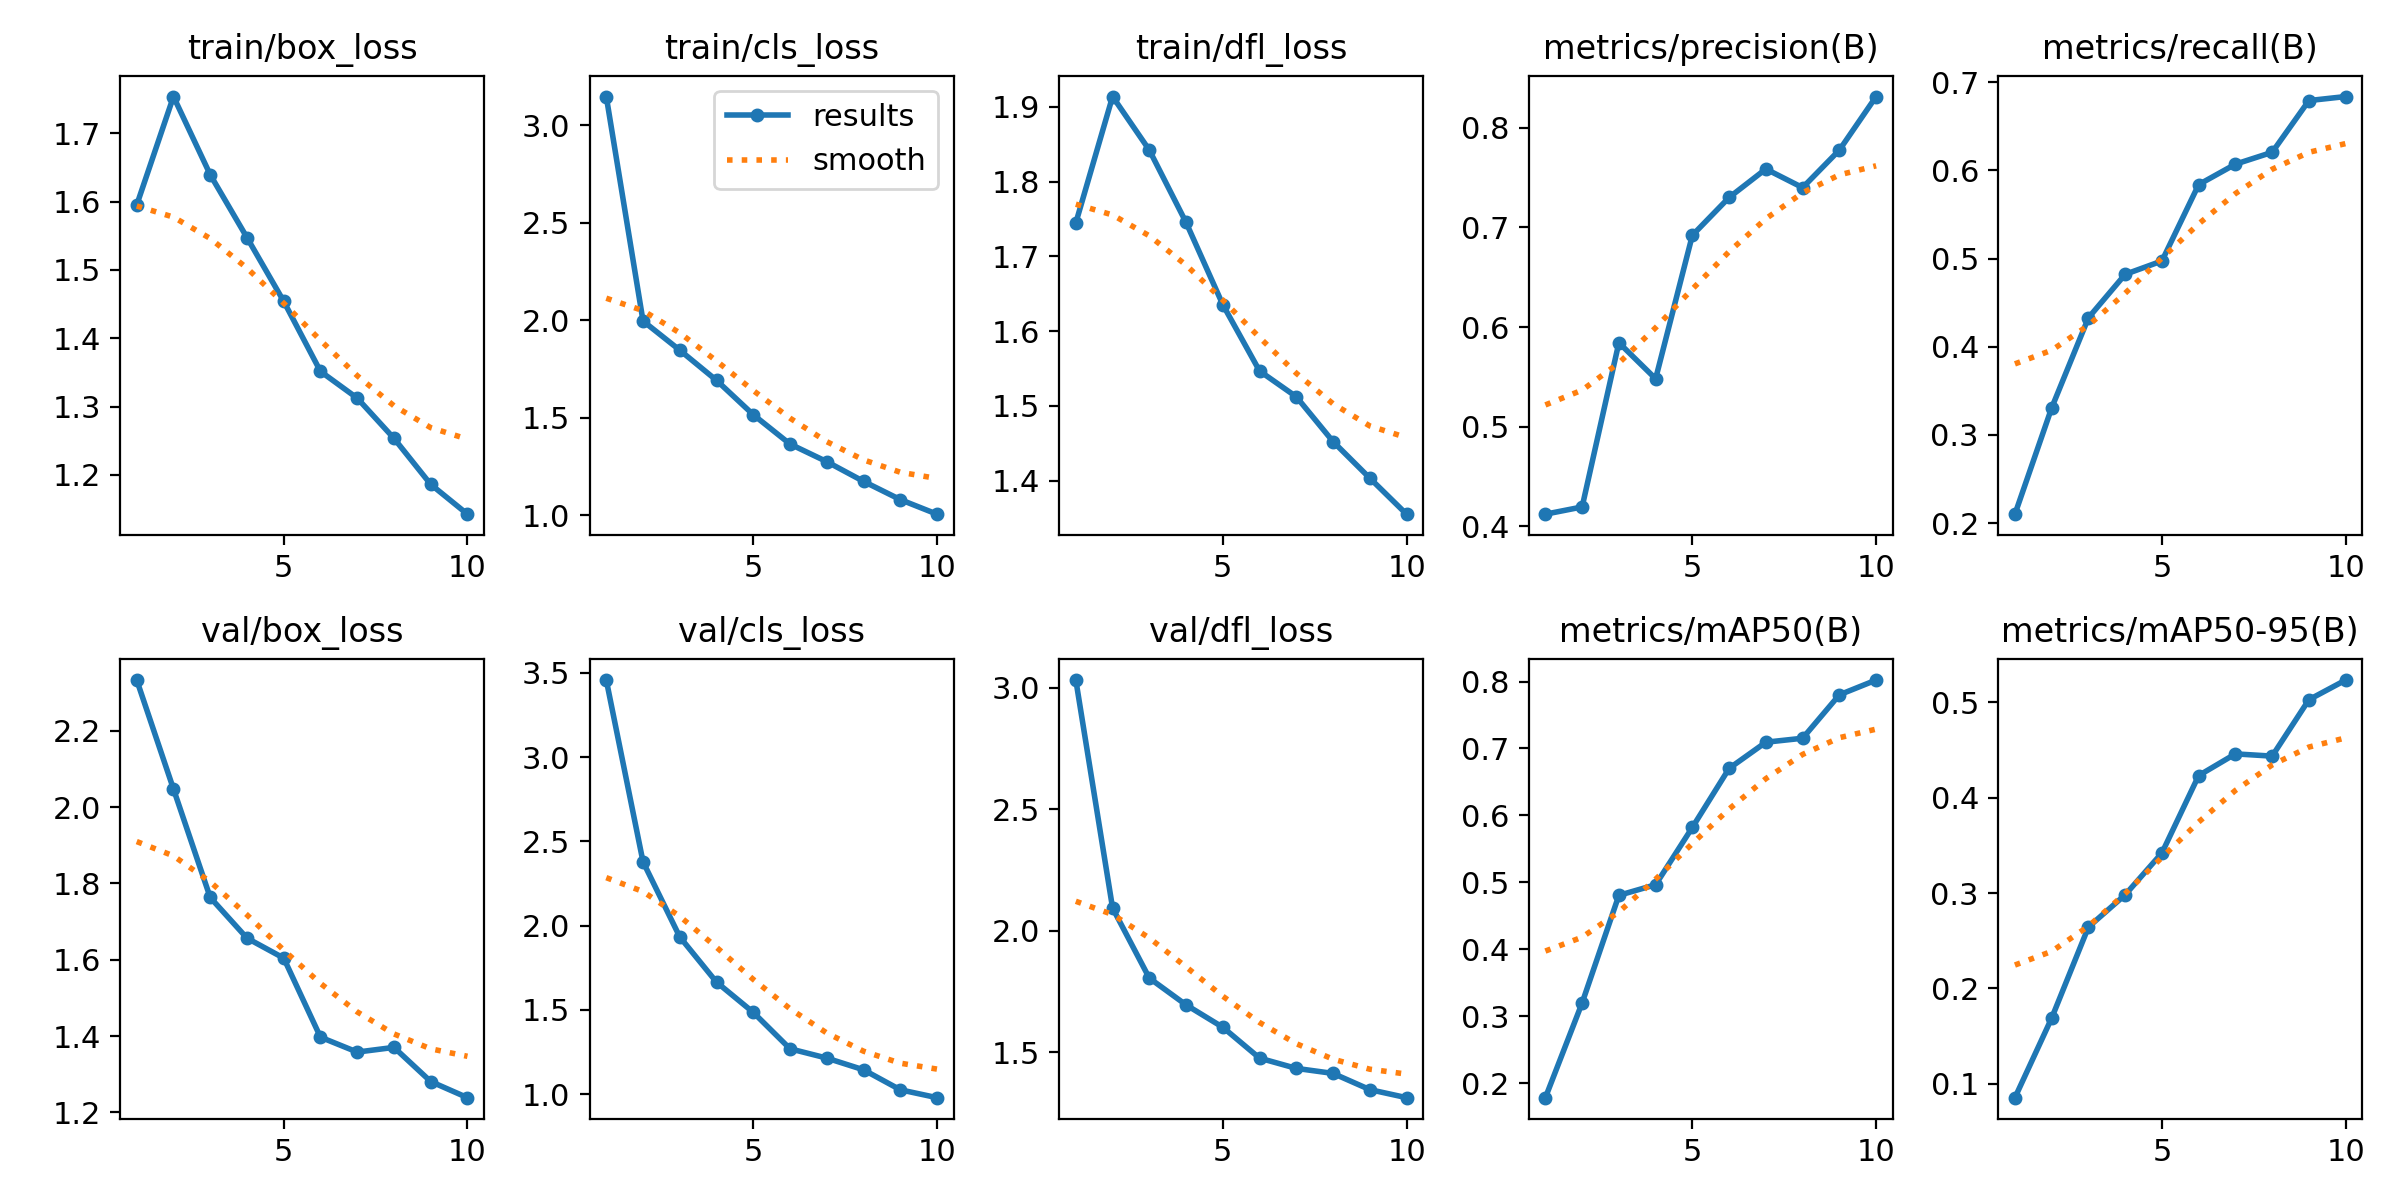

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

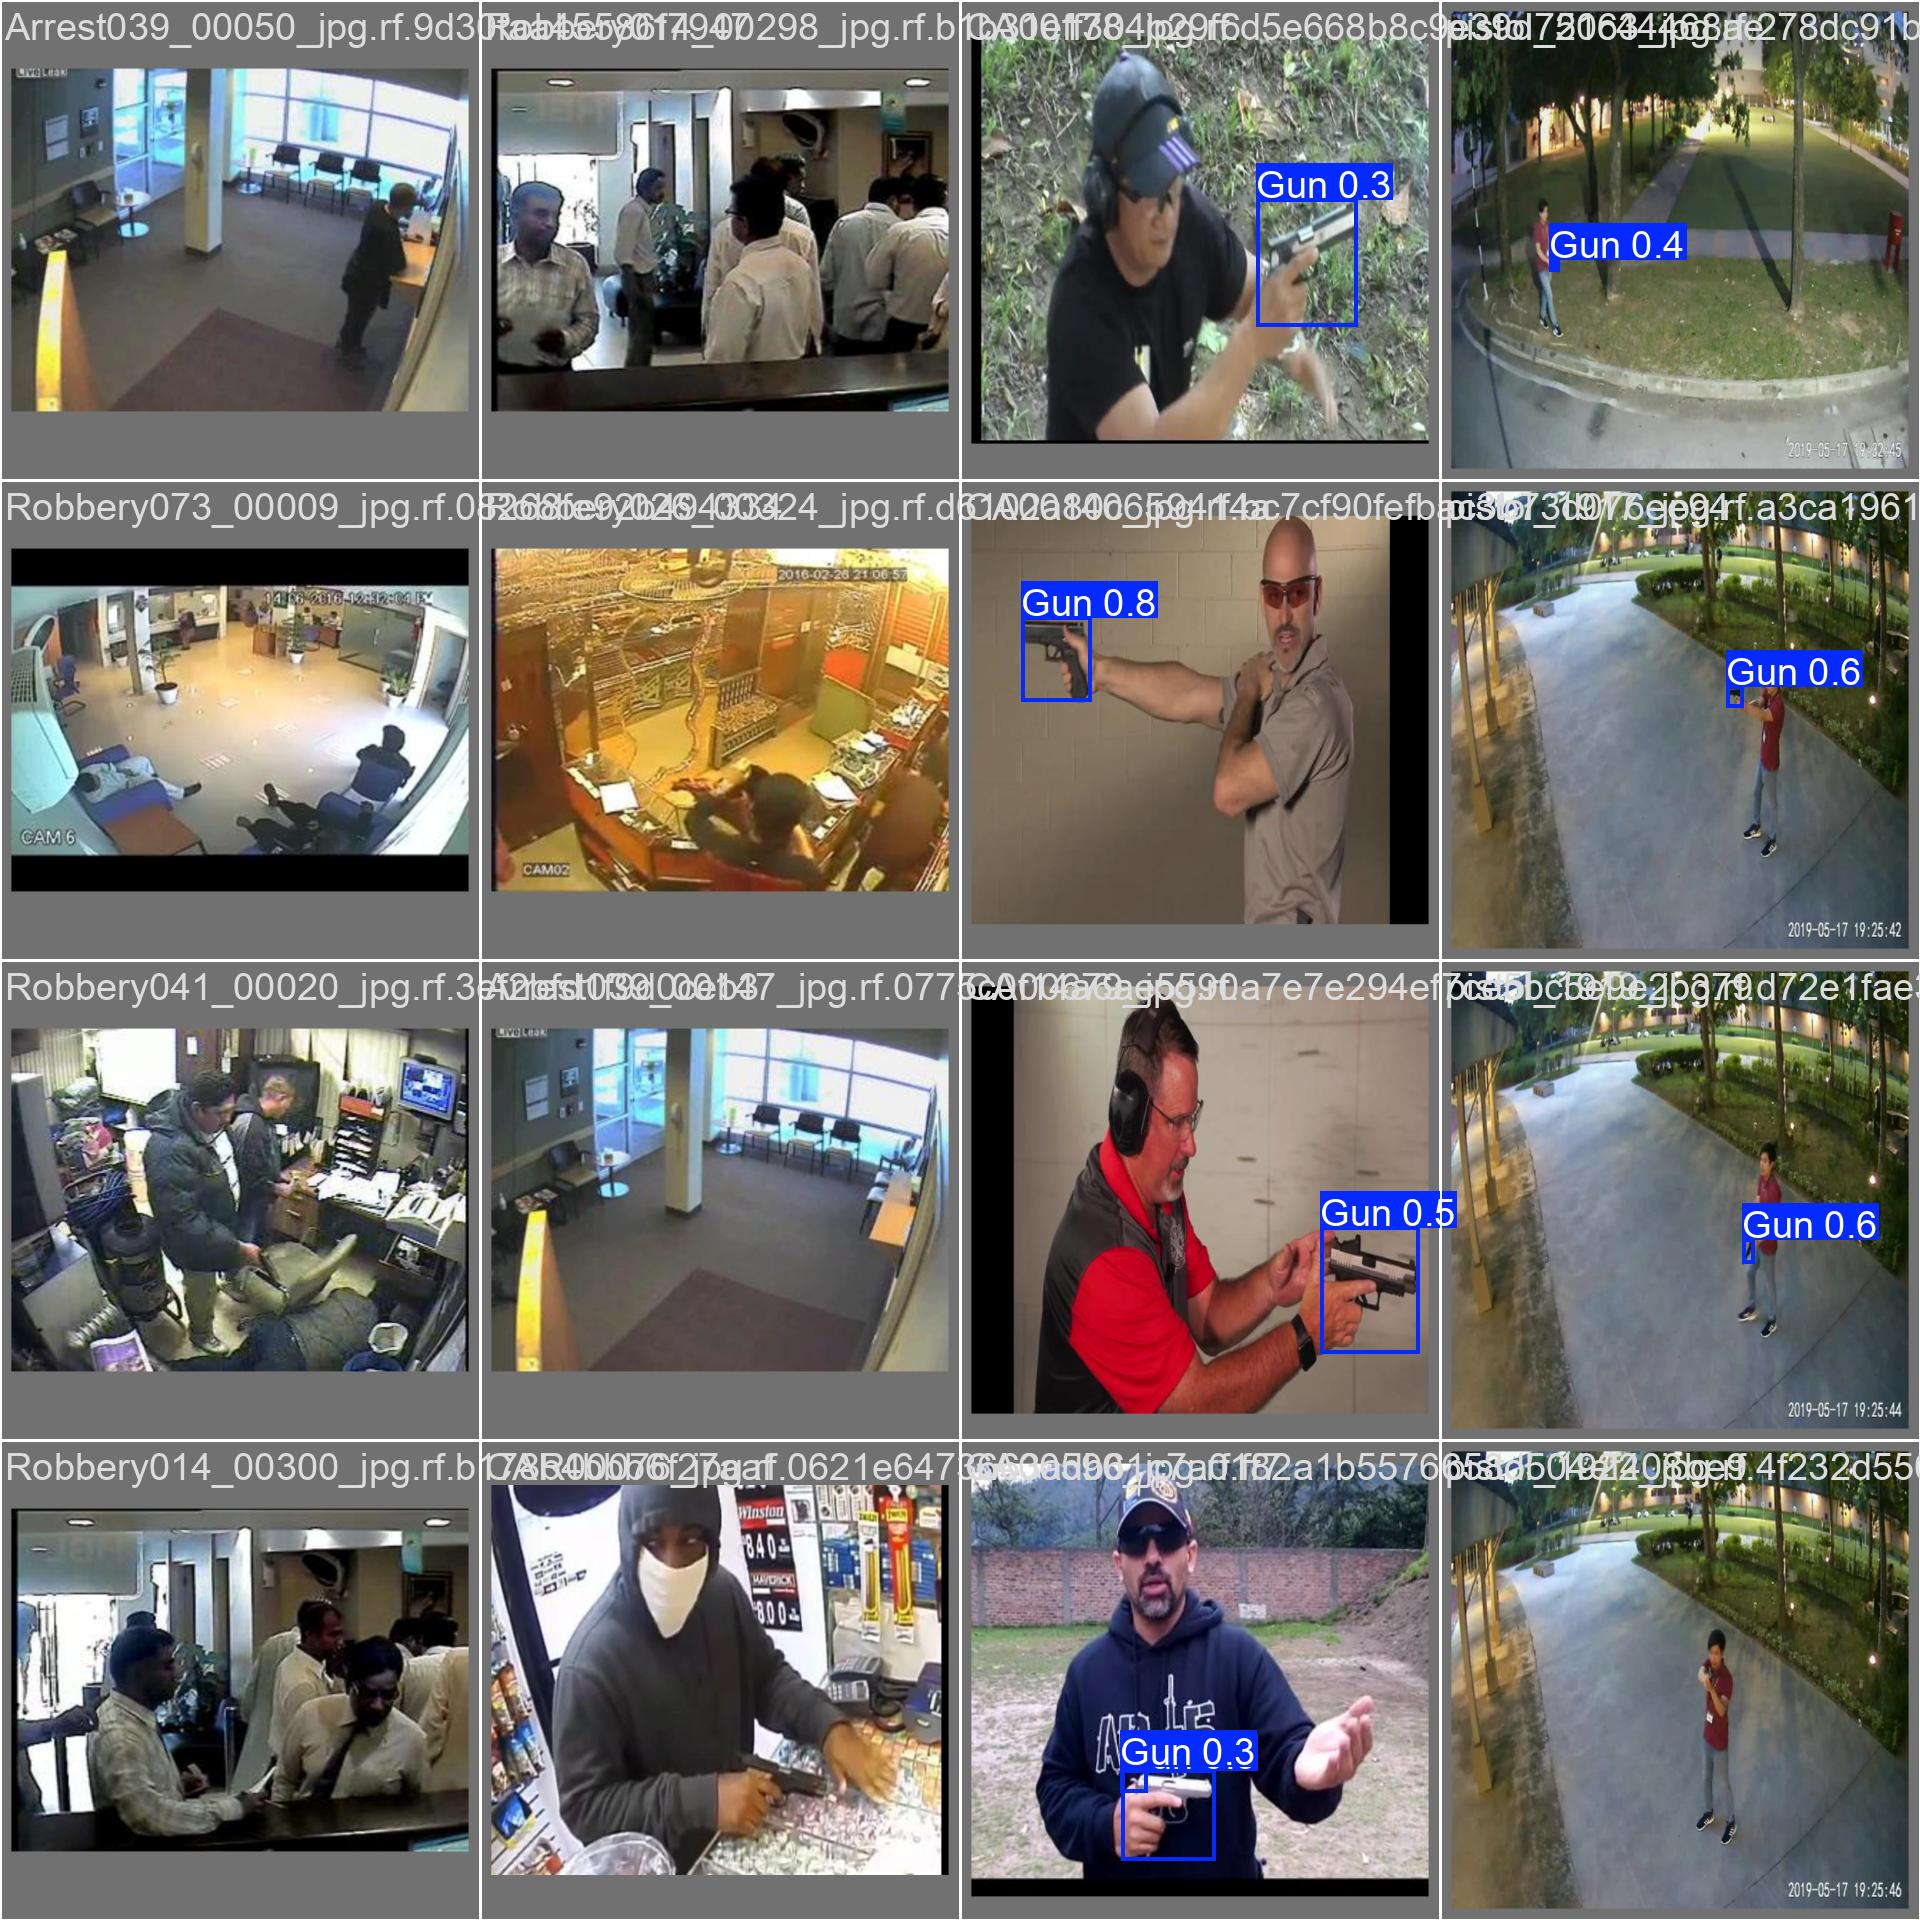

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,421,701 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/两点钟模型-3/valid/labels.cache... 259 images, 0 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/两点钟模型-3/valid/images/08_21C_0250_jpg.rf.b164fca68a7a644a126019aa776912c1.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.59it/s]
                   all        259       4652      0.987      0.979      0.991      0.749
                  bag1        258        258      0.986      0.984      0.994       0.78
                  bag2        257        257      0.998          1      0.995      0.892
                  bag3        250        250          1      0.942      0.995      0.808
                  bag4        258        258      0.996          1      0.995      0

## Inference with custom model

In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/674 /content/datasets/we-2/test/images/Arrest009_00001_jpg.rf.713c8e504a1ea094db3d8988b153da68.jpg: 480x640 (no detections), 61.7ms
image 2/674 /content/datasets/we-2/test/images/Arrest041_00033_jpg.rf.266dc476e9020816869e1cf72e6a3ea9.jpg: 480x640 (no detections), 12.5ms
image 3/674 /content/datasets/we-2/test/images/CA00033_jpg.rf.9316c1f7da8f31952b8e393a3fd3a673.jpg: 640x256 2 Guns, 53.7ms
image 4/674 /content/datasets/we-2/test/images/CA00073_jpg.rf.e8d1ab26da379c2d8a09f0e1ad45d532.jpg: 640x608 1 Gun, 53.2ms
image 5/674 /content/datasets/we-2/test/images/CA00157_jpg.rf.90454162b393621754616bf37f7885da.jpg: 640x288 2 Guns, 54.7ms
image 6/674 /content/datasets/we-2/test/images/CA00166_jpg.rf.458b1b39d9f23e89bdec7c7989cc0091.jpg: 640x320 (no detections), 52.5ms
image 7/674 /content/datasets/we-2/test/images/CA0018

In [17]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml save=True

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/we-2/valid/labels.cache... 881 images, 54 backgrounds, 0 corrupt: 100% 881/881 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 56/56 [00:13<00:00,  4.16it/s]
                   all        881        901       0.83      0.686      0.803      0.523
Speed: 0.6ms preprocess, 8.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val



---

**Análise das Métricas de Treinamento**

Este notebook apresenta a análise das métricas de desempenho de um modelo de visão computacional treinado para detecção de armas de fogo. O modelo será implementado em tempo real em uma **Raspberry Pi 4**, sendo utilizado em aplicações de segurança.  

---

**Métricas de Desempenho**

| Métrica       | Valor  | Interpretação                                                                 |
|---------------|--------|------------------------------------------------------------------------------|
| **Precisão (P)**  | 0.83   | **83% das previsões positivas estão corretas.** Alta precisão reduz falsos positivos. |
| **Revocação (R)** | 0.686  | **68,6% das armas reais são detectadas.** Baixa revocação significa que 31,4% das armas podem não ser detectadas. |
| **mAP@50**     | 0.803  | Boa precisão média na detecção com sobreposição de 50%.                     |
| **mAP@50-95**  | 0.523  | Desempenho moderado em critérios mais rigorosos de sobreposição.            |

---

**Interpretação**

- **Precisão (P):** O modelo é eficiente em evitar falsos positivos, o que reduz alarmes desnecessários. Isso é importante em aplicações de segurança, mas não pode ser alcançado à custa de ignorar detecções reais.  
- **Revocação (R):** A taxa de 68,6% indica que o modelo está deixando de detectar uma parcela significativa das armas reais, o que pode ser crítico em cenários de segurança.  
- **mAP@50:** O modelo consegue localizar e classificar as armas de forma confiável em um nível básico de sobreposição.  
- **mAP@50-95:** A performance moderada reflete que o modelo tem dificuldade em condições mais desafiadoras (ângulos, iluminação, etc.).

---

**Desafios com a Raspberry Pi 4**

1. **Limitações de hardware:**  
   A Raspberry Pi 4 tem recursos computacionais limitados, o que pode dificultar a execução de modelos complexos em tempo real.  

2. **Modelo leve:**  
   É necessário utilizar um modelo otimizado, como YOLOv5 Nano, YOLOv8n ou YOLO11n, para balancear precisão e velocidade.

---

**Recomendações para Melhorias**

1. **Aumentar a Revocação (R):**  
   - Utilizar **data augmentation** com imagens variando iluminação, ângulos e cenários.  
   - Ajustar o **threshold de detecção** para aceitar mais predições (aumentando a revocação), mas monitore o impacto nos falsos positivos.  

2. **Quantização do Modelo:**  
   - Adotar **quantização pós-treinamento (INT8)** para reduzir o tamanho do modelo e melhorar a performance na Raspberry Pi.

3. **Testes em Cenários Reais:**  
   - Avaliar o modelo com streams de vídeo reais para entender como ele performa em situações de campo.  

4. **Uso de Frameworks Otimizados:**  
   - Implemente o modelo usando **TensorFlow Lite**, **ONNX Runtime**, ou equivalentes para Raspberry Pi.  

5. **Balancear Precisão e Revocação:**  
   - Em detecção de armas, é preferível aumentar a revocação para evitar que armas reais passem despercebidas, mesmo que isso gere mais falsos positivos.

---

As métricas atuais indicam que o modelo é adequado como protótipo, mas ainda precisa de melhorias, principalmente na **revocação** e na **otimização para hardware embarcado**. Estas melhorias garantirão um desempenho confiável em tempo real na Raspberry Pi 4.  

---

**NOTE:** Let's take a look at few results.

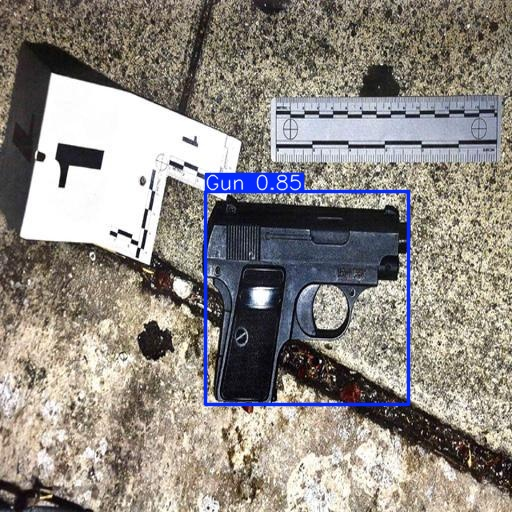

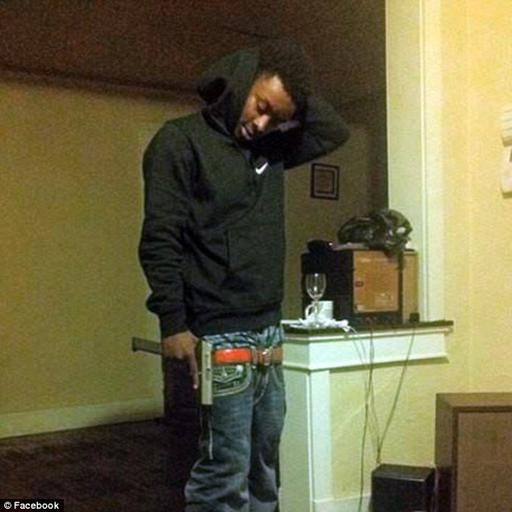

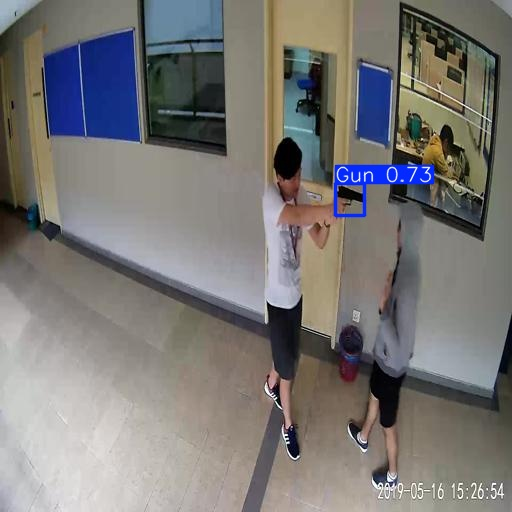

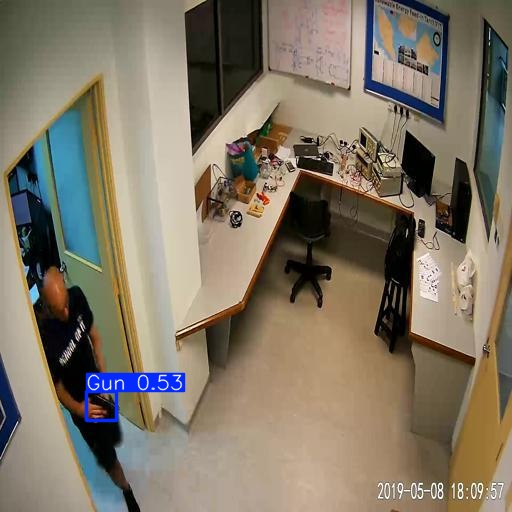

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[4:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [21]:
project = rf.workspace("lpmu06-jsgfm").project("we-690o3-ghh2q-kwwll")
version = project.version(1)

version.deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")


loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/lpmu06-jsgfm/we-690o3-ghh2q-kwwll/1
Share your model with the world at: https://universe.roboflow.com/lpmu06-jsgfm/we-690o3-ghh2q-kwwll/model/1


In [ ]:
!pip install inference

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.